In [20]:
import pandas as pd
dataset=pd.read_csv("Mall_customers.csv")

In [21]:
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [22]:
print(dataset.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [23]:
features=dataset.iloc[:,3:].values

In [24]:
print(type(features))

<class 'numpy.ndarray'>


In [25]:
print(features[:5,:])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


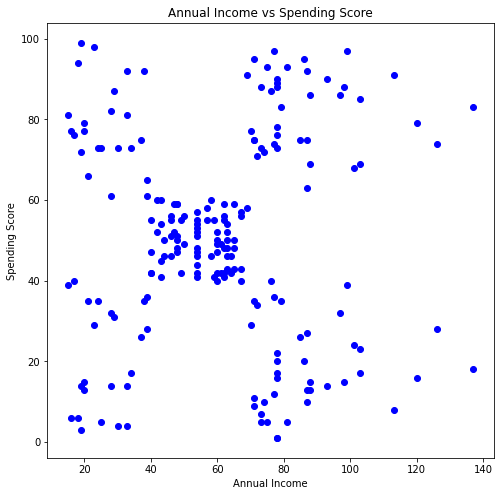

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(features[:,0],features[:,1],c="blue")
plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37233.81451071002, 30259.657207285458, 25018.576334776328, 21932.392044240973, 19657.783608703947]


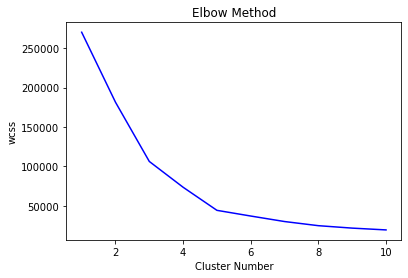

In [26]:
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    model=KMeans(n_clusters=k,init='k-means++')
    model.fit(features)
    wcss.append(model.inertia_)
print(wcss)
plt.plot(range(1,11),wcss,c="blue")
plt.title("Elbow Method")
plt.xlabel("Cluster Number")
plt.ylabel("wcss")
plt.show()

In [19]:
k=5
model=KMeans(n_clusters=k,init='k-means++')
model.fit(features)
print(model.cluster_centers_)
    


NameError: name 'KMeans' is not defined

In [28]:
labels=model.predict(features)

In [29]:
print(labels)

[7 4 5 4 7 4 5 4 5 4 5 4 5 4 5 4 7 4 7 4 7 4 5 4 5 4 7 4 7 4 5 4 5 4 5 4 5
 4 7 4 7 4 7 1 7 1 1 1 7 7 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 0 8 0 3 2 8 2 8 0 8 2 3 2 8 2 8 2 3 0 3 2 3 0 8
 2 3 2 3 2 8 2 3 2 8 2 8 0 3 2 3 2 8 2 3 2 8 2 8 2 3 2 3 2 8 2 3 9 3 9 3 9
 3 9 6 9 6 9 6 9 6 9 6 9 6 9 6]


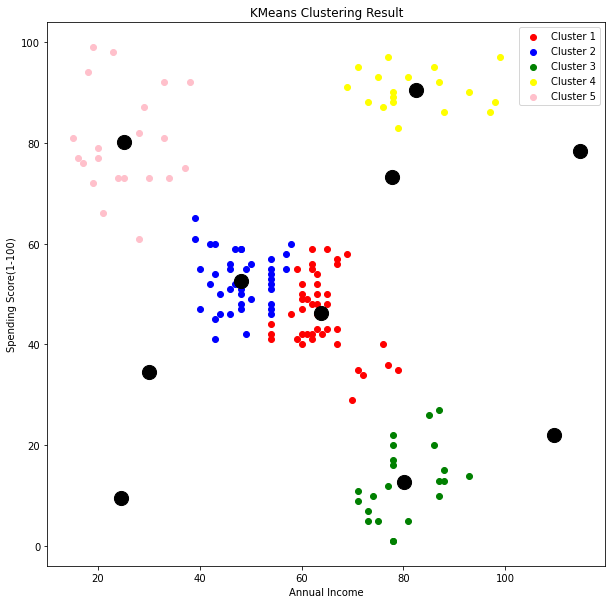

In [30]:
plt.figure(figsize=(10,10))
plt.scatter(features[labels == 0,0],features[labels == 0,1],c='red',label='Cluster 1')
plt.scatter(features[labels == 1,0],features[labels == 1,1],c='blue',label='Cluster 2')
plt.scatter(features[labels == 2,0],features[labels == 2,1],c='green',label='Cluster 3')
plt.scatter(features[labels == 3,0],features[labels == 3,1],c='yellow',label='Cluster 4')
plt.scatter(features[labels == 4,0],features[labels == 4,1],c='pink',label='Cluster 5')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c='black',s=200)
plt.title("KMeans Clustering Result")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score(1-100)")
plt.legend()
plt.show()
